# Dimensionality Reduction Assignments

## 1. Applying PCA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%config InlineBackened.format_figure = 'svg'

In [ ]:
from google.colab import files
files.upload_file = files.upload()

Saving student_grades.csv to student_grades.csv


In [ ]:
# 1. Read in the student grades data set
df = pd.read_csv('student_grades.csv')
df.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [ ]:
# 2. Drop the first column with student_id
model_df = df.drop(columns = ["student_id"])
model_df.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


In [ ]:
model_df.mean()

,0
math,53.05
science,53.22
cs,52.75
band,70.04
english,60.97
history,63.60
spanish,65.56
physed,67.61


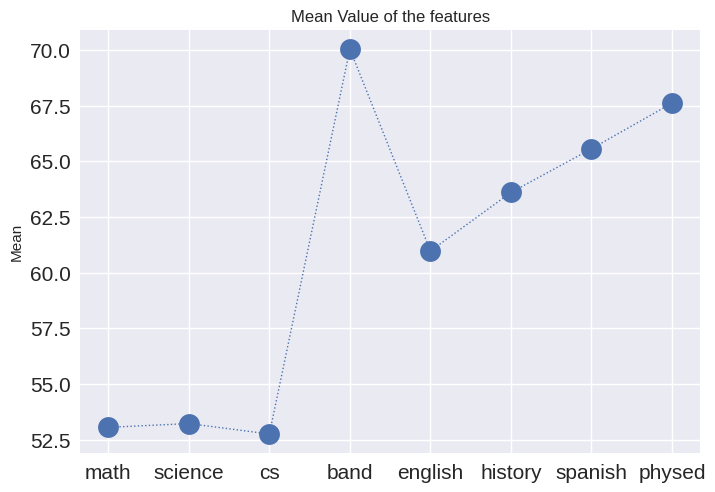

In [ ]:
model_df.mean().plot(marker ="o", ms =15 , ls = ":", lw =1, title = "Mean Value of the features", fontsize = 15)
plt.ylabel("Mean")
plt.show()

In [ ]:
# 3. Center the data
df_centered = model_df - model_df.mean()
df_centered.mean().round(2)

,0
math,0.0
science,0.0
cs,0.0
band,-0.0
english,0.0
history,0.0
spanish,-0.0
physed,0.0


In [ ]:
from re import S
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
model_standard = std_scaler.fit_transform(model_df)
df_standard = pd.DataFrame(model_standard, columns= model_df.columns.str.capitalize())
df_standard

,Math,Science,Cs,Band,English,History,Spanish,Physed
0,-0.509284,-0.374647,-0.205300,0.633958,-1.566095,-1.127182,-1.450335,0.671353
1,0.935494,0.845468,0.914517,-0.646765,0.756626,0.943152,0.515480,-0.574200
2,0.140866,-0.015790,-0.205300,0.954139,0.582422,0.483078,0.570086,0.422242
3,-0.003612,0.271296,0.018664,1.594500,0.930830,0.770624,1.061540,1.792350
4,0.140866,0.630154,0.391936,-0.486675,1.221171,0.770624,0.679298,-0.947865
...,...,...,...,...,...,...,...,...
95,2.452510,2.065583,2.556914,-1.447217,1.163103,1.230698,1.334570,-0.325089
96,-0.581523,-0.589962,-0.727881,0.473868,-0.869278,-0.782126,-1.177305,0.173132
97,-1.665106,-1.451219,-1.250461,-0.966946,-1.159618,-1.012163,-1.013487,-0.075979
98,-0.509284,-0.446419,-0.877189,0.153687,-0.753142,-1.127182,-0.849669,-0.574200


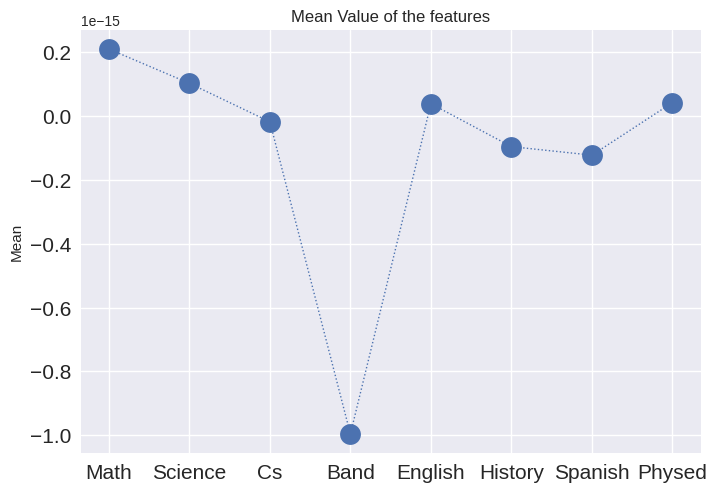

In [ ]:
df_standard.mean().plot(marker ="o", ms =15 , ls = ":", lw =1, title = "Mean Value of the features", fontsize = 15)
plt.ylabel("Mean")
plt.show()

In [ ]:
# 4. Fit a PCA model with 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_standard)

PCA(n_components=2)

In [ ]:
# 5. View and interpret the explained variance ratios
pca.explained_variance_ratio_

array([0.65198688, 0.22590995])

## 2. Interpreting PCA

In [ ]:
# 1. View and interpret the components of the PCA model
pca.components_

array([[ 0.41067887,  0.41054002,  0.40545998, -0.00191139,  0.40656736,
         0.40795718,  0.40559114,  0.04656245],
       [ 0.00978021,  0.02873543,  0.02743743,  0.70564179, -0.05172237,
        -0.05162807, -0.03996004,  0.70246566]])

In [ ]:
df_standard.columns

Index(['Math', 'Science', 'Cs', 'Band', 'English', 'History', 'Spanish',
       'Physed'],
      dtype='object')

In [ ]:
# pc1 :

In [ ]:
df_transformed = pd.DataFrame(pca.transform(df_standard), columns= ['pc1', 'pc2'])
df_transformed

,pc1,pc2
0,-2.100960,1.094722
1,1.978045,-0.909630
2,0.651055,0.887337
3,1.321249,2.262133
4,1.518651,-1.109114
...,...,...
95,4.395796,-1.273111
96,-1.918991,0.545774
97,-3.083753,-0.675253
98,-1.885783,-0.205683


In [ ]:
df_transformed.mean().round(2) # ~0

,0
pc1,-0.0
pc2,-0.0


In [ ]:
# 3. Interpret the clusters of students that you see and make recommendations for the guidance counselor

pca_explaination = pd.DataFrame(pca.components_ ,
                       columns= df_centered.columns.str.capitalize(),
                       index = ["pc1", "pc2"])
pca_explaination.round(2)


,Math,Science,Cs,Band,English,History,Spanish,Physed
pc1,0.41,0.41,0.41,-0.00,0.41,0.41,0.41,0.05
pc2,0.01,0.03,0.03,0.71,-0.05,-0.05,-0.04,0.70


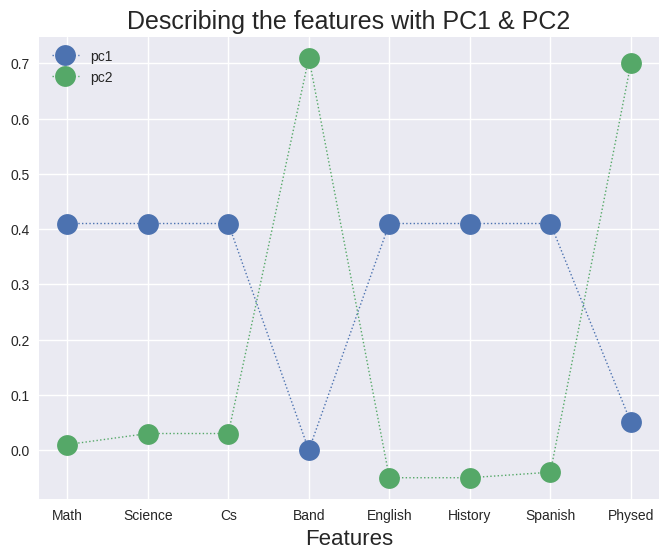

In [ ]:
pca_explaination.round(2).T.plot(figsize = (8,6), ls = ":", marker = 'o', ms = 15, lw = 1)
plt.title("Describing the features with PC1 & PC2", fontsize = 18)
plt.xlabel("Features", fontsize = 16)
plt.legend(loc =0)
plt.show()

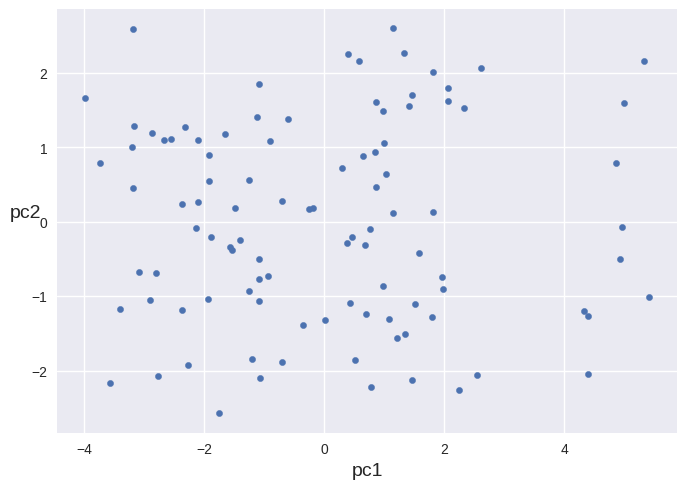

In [ ]:
# 2. Plot the students on a scatter plot with the x-axis as PC 1 and the y-axis as PC 2
df_transformed.plot(kind  = 'scatter',
                    x= "pc1",
                    y = "pc2")
plt.xlabel("pc1" ,
           rotation =0,
           fontsize =14)
plt.ylabel("pc2" ,
           rotation =0,
           fontsize =14)
plt.show()

In [ ]:
print(" PC2: Strong in Band & Physed",
      " PC1:  Weak in Band & Physed",  sep ="\n")

 PC2: Strong in Band & Physed
 PC1:  Weak in Band & Physed


## 3. T-SNE

In [ ]:
# 1. Fit a t-SNE model with 2 components
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , random_state= 42)


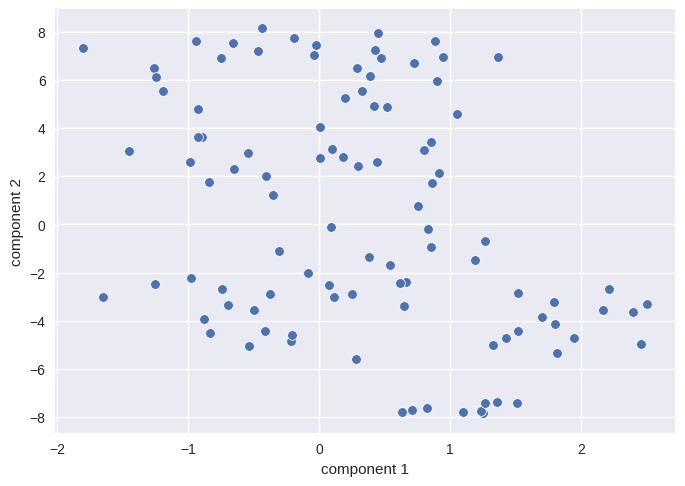

In [ ]:
# 2. Plot the students on a scatter plot with the x-axis as component 1 and the y-axis as component 2
data_tsne = tsne.fit_transform(model_df)
df_tsne = pd.DataFrame(data_tsne , columns = ["component 1", "component 2"])

sns.scatterplot(df_tsne , x = "component 1", y = "component 2")
sns.despine()

In [ ]:
# 3. Interpret the data you see on the plot


## 4. T-SNE with Colors

In [ ]:
len(model_df.columns)

8

In [ ]:
# 1. Fit a KMeans model with 3 clusters
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=3,n_init ="auto",random_state=42)
kmeans_3.fit(model_df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans_3.labels_
labels

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0], dtype=int32)

In [ ]:
centroids = kmeans_3.cluster_centers_
centroids

array([[57.11363636, 57.79545455, 56.38636364, 70.68181818, 71.88636364,
        74.79545455, 77.18181818, 68.52272727],
       [42.70212766, 42.76595745, 43.04255319, 69.76595745, 45.76595745,
        47.95744681, 49.23404255, 66.57446809],
       [87.22222222, 85.44444444, 85.66666667, 68.33333333, 87.        ,
        90.55555556, 94.        , 68.55555556]])

In [ ]:
model_df["KMEANS3_Labels"] = pd.Series(kmeans_3.labels_)
# model_df.drop(columns=["KMEANS3_Labels"], inplace = True)

In [ ]:
df_tsne_kmeans3

,comp1,comp2,KMEANS3_Labels
0,0.724044,6.715199,1
1,1.325182,-4.998507,0
2,0.074584,-2.525517,0
3,-0.876796,-3.935858,0
4,1.801274,-4.154284,0
...,...,...,...
95,1.268556,-7.404992,2
96,0.325245,5.525485,1
97,-1.248905,6.124141,1
98,0.193769,5.240020,1


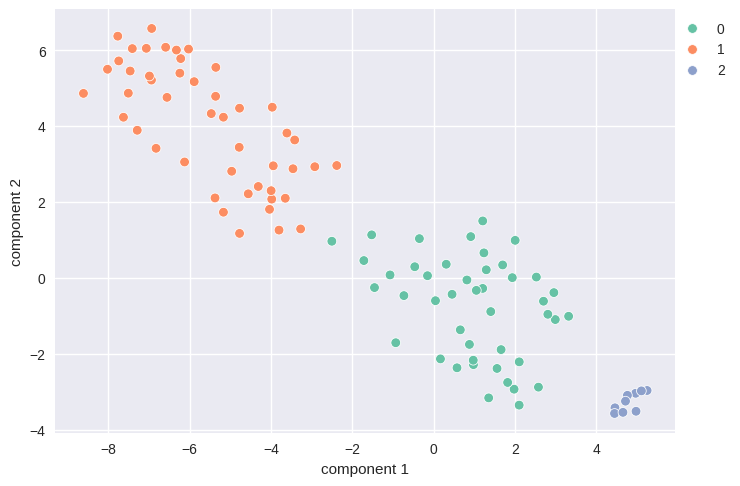

In [ ]:
# 2. Overlay the 3 clusters onto a T-SNE plot
data_tsne_kmeans3 = tsne.fit_transform(model_df)
df_tsne_kmeans3 = pd.DataFrame(data_tsne_kmeans3 , columns = ["component 1", "component 2"])
df_tsne_kmeans3["KMEANS3_Labels"] = pd.Series(kmeans_3.labels_)

sns.scatterplot(data = df_tsne_kmeans3, x = "component 1", y = "component 2", hue = "KMEANS3_Labels" , palette="Set2")
#plt.cm.G
plt.legend(bbox_to_anchor = (1.1,1))
sns.despine()
#df_tsne_kmeans3.plot(kind = "scatter", hue = "KMEANS3_Labels", x = "comp1", y ="comp2")

In [ ]:
model_df[:-1].columns.str.capitalize()

Index(['Math', 'Science', 'Cs', 'Band', 'English', 'History', 'Spanish',
       'Physed', 'Kmeans3_labels'],
      dtype='object')

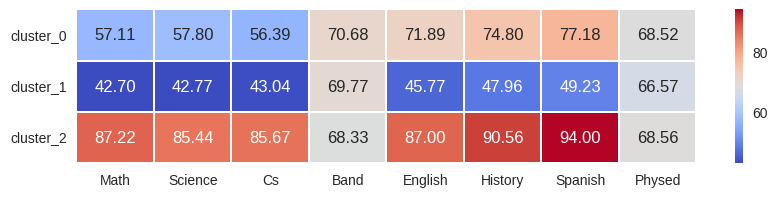

In [ ]:
centroid_df = pd.DataFrame(centroids ,
                           columns=model_df.drop(columns=['KMEANS3_Labels']).columns.str.capitalize().to_list(),
                           index = ["cluster_0", "cluster_1", "cluster_2"]
                           )
plt.figure(figsize = (10,2))
sns.heatmap(centroid_df , annot = True, fmt = "0.2f", cmap = "coolwarm", linewidths = 0.2)
plt.yticks(rotation = 0)
plt.show()